In [3]:
from litellm import completion
import os
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("OPENROUTER_API_KEY")

In [17]:
import requests

import json

url = "https://openrouter.ai/api/v1/chat/completions"

headers = {

    "Authorization": f"Bearer {api_key}",

    "Content-Type": "application/json"

}

payload = {

    "model": "google/gemini-2.5-flash-image-preview",

    "messages": [

        {

            "role": "user",

            "content": "Create a sprite of top down forest, zoomed in, maybe 5x5 meters. It needs to look like in avatar. Lush greenery. Colorful stuff. Purple stuff. Big flora."

        }

    ],

    "modalities": ["image", "text"],
    "image_config": {

        "aspect_ratio": "16:9",

        "image_size": "2K"

    }

}

response = requests.post(url, headers=headers, json=payload)

result = response.json()

# The generated image will be in the assistant message

if result.get("choices"):

    message = result["choices"][0]["message"]

    if message.get("images"):

        for image in message["images"]:

            image_url = image["image_url"]["url"]  # Base64 data URL

            print(f"Generated image: {image_url[:50]}...")

Generated image: data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABUAA...


''
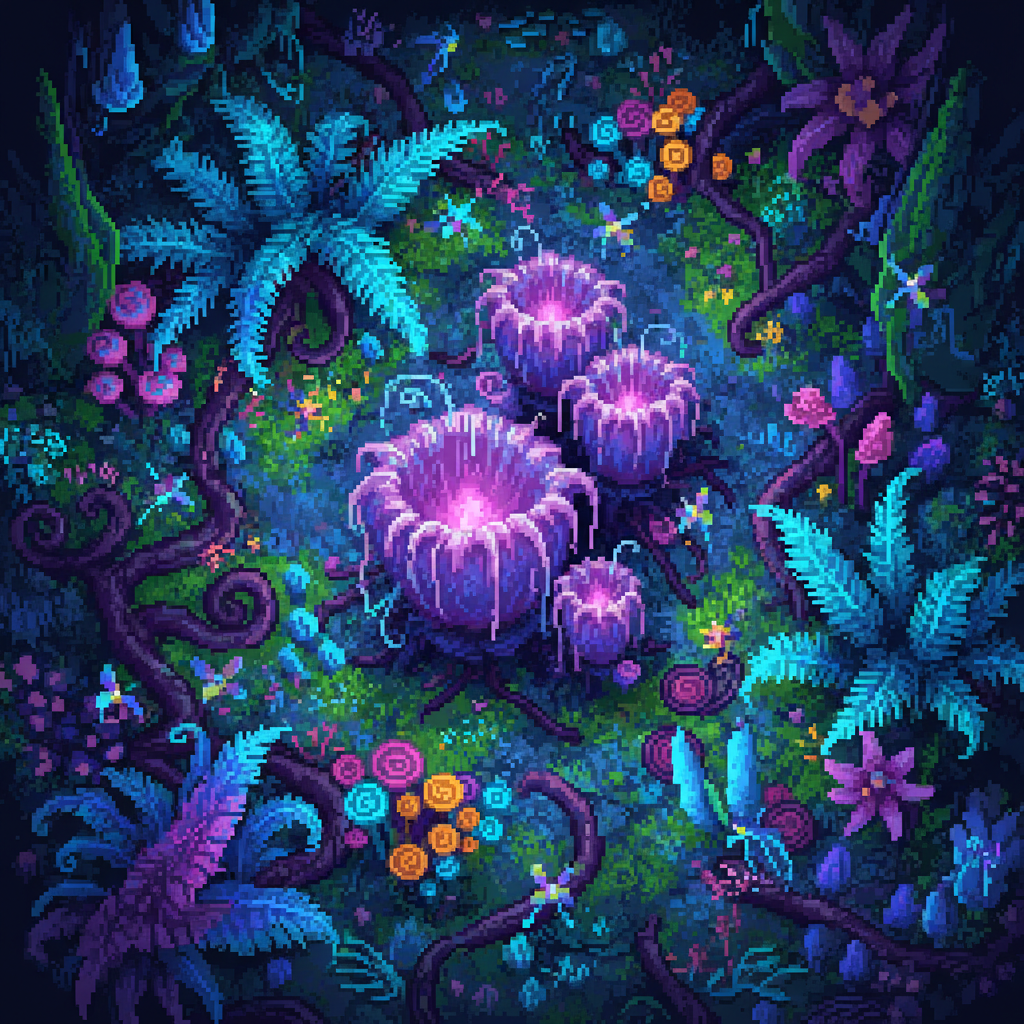

In [12]:
image_url

{'role': 'assistant',
 'content': "Here's a sprite for a top-down forest, zoomed in to about a 5x5-meter area, with lush, colorful, and purple flora, inspired by the Avatar aesthetic: ",
 'refusal': None,
 'reasoning': None,
 'annotations': [],
 'images': [{'type': 'image_url',
   'image_url': {'url': ''},
   'index': 0}]}
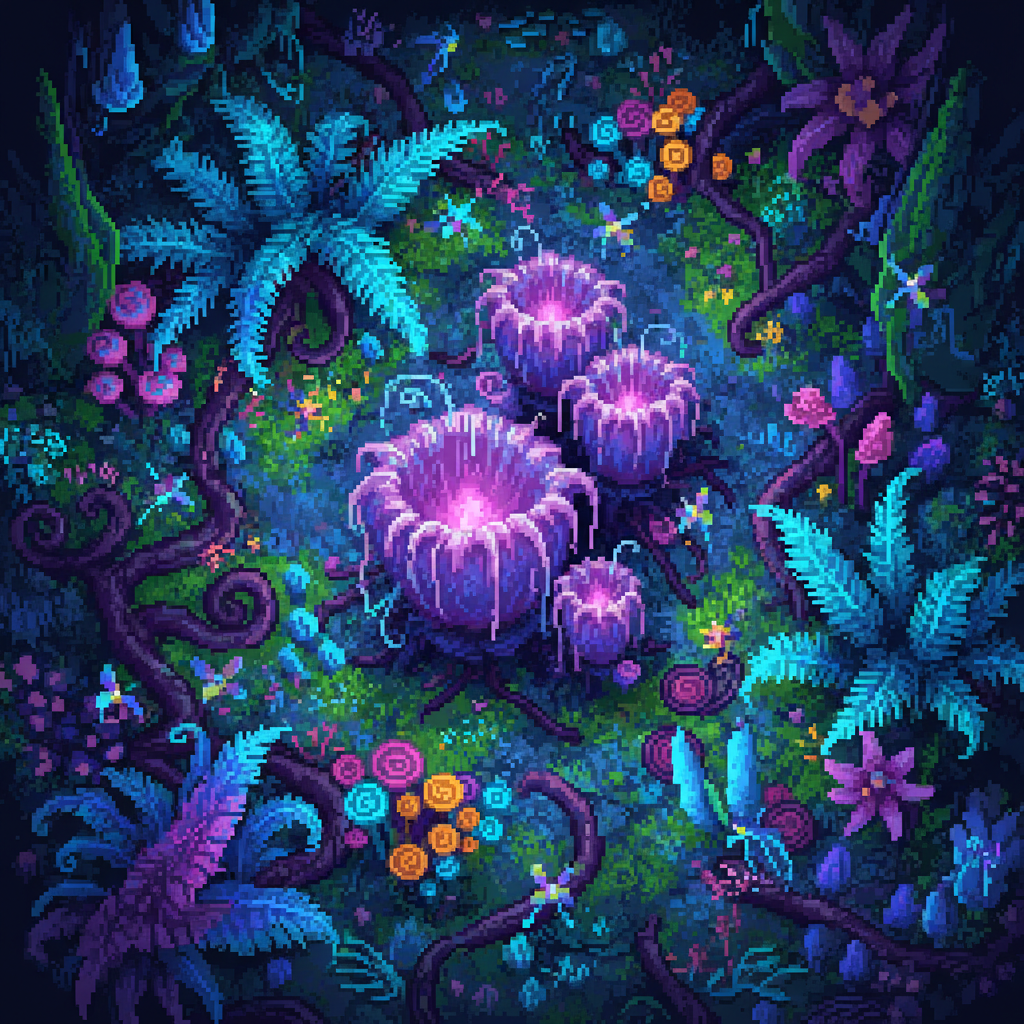

In [13]:
message

In [18]:
from PIL import Image
import io
import base64

# ... (Assume 'data_url' is extracted as shown in Method 1) ...

# Split header and data
header, encoded = image_url.split(",", 1)

# Decode
image_data = base64.b64decode(encoded)

# Convert to image object and show
image = Image.open(io.BytesIO(image_data))
image.show()  # This opens your default OS image viewer
image.save("output_image.png") # Optional: Save it

In [2]:
from src.models.base import init_db, get_session
from src.models.player import Player
from pathlib import Path

In [3]:
import os
db_path = os.path.abspath("../data/sw.db")
print(f"Using database: {db_path}")  # Verify the path
init_db(db_path)

Using database: C:\Users\Dell\PycharmProjects\llm_gm\agent_gm\data\sw.db


In [41]:
with get_session() as session:
    # Check for existing player
    players = session.query(Player).all()
    print(f"Found {len(players)} players in the database.")
    print(players)
    print(players[0])
    player = players[0] if players else None
    
    player_id = player.id if player else None
    
    

Found 2 players in the database.
[<Player(id=c78b34d5-4177-4452-a779-633617fcec92, name=Mathias Thun)>, <Player(id=8750c701-4e24-434f-9404-011f64a2337c, name=Probuvach)>]
<Player(id=c78b34d5-4177-4452-a779-633617fcec92, name=Mathias Thun)>


In [5]:
from src.agents.dm_orchestrator import DMOrchestrator

C:\Users\Dell\PycharmProjects\llm_gm\agent_gm\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
dm = DMOrchestrator(player_id=player_id)

Session message history has an orphaned toolUse with no toolResult. Adding toolResult content blocks to create valid conversation.


In [49]:
location = dm.describe_scene()

╭─────────────────────────────────────────────── Temple Hangar Bay ───────────────────────────────────────────────╮
│ A massive landing and docking facility for Jedi starships and other craft. Technicians maintain the ships, and  │
│ pilots and Jedi prepare for missions. The hangar is busy with activity as Jedi depart for and return from       │
│ assignments across the galaxy. A small fleet of Jedi starfighters and transports is always ready.               │
│                                                                                                                 │
│ You see: Anakin Skywalker, Obi-Wan Kenobi, Rex (CT-7567), Cody (CC-2224), R2-D2, Taun We, Lama Su, R2-D4, Plo   │
│ Koon's Wingman, Captain "Gears" (CT-7321), "Stitch" (CT-8845), "Rookie" (CT-9982), "Sarge" (CT-5510)            │
╰──────────────────────────────────────────────────── morning ────────────────────────────────────────────────────╯

In [54]:
nano_banana_prompt = f"""
Create a sprinte of a 2d game scene. It needs to be top down. Do it of the following location: {location}"""

In [55]:
import requests

import json

url = "https://openrouter.ai/api/v1/chat/completions"

headers = {

    "Authorization": f"Bearer {api_key}",

    "Content-Type": "application/json"

}

payload = {

    "model": "google/gemini-2.5-flash-image-preview",

    "messages": [

        {

            "role": "user",

            "content": f"{nano_banana_prompt}"

        }

    ],

    "modalities": ["image", "text"],
    "image_config": {

        "aspect_ratio": "16:9",

        "image_size": "2K"

    }

}

response = requests.post(url, headers=headers, json=payload)

result = response.json()

# The generated image will be in the assistant message

if result.get("choices"):

    message = result["choices"][0]["message"]

    if message.get("images"):

        for image in message["images"]:

            image_url = image["image_url"]["url"]  # Base64 data URL

            print(f"Generated image: {image_url[:50]}...")

Generated image: data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABUAA...


In [56]:
from PIL import Image
import io
import base64

# ... (Assume 'data_url' is extracted as shown in Method 1) ...

# Split header and data
header, encoded = image_url.split(",", 1)

# Decode
image_data = base64.b64decode(encoded)

# Convert to image object and show
image = Image.open(io.BytesIO(image_data))
image.show()  # This opens your default OS image viewer
image.save("output_image.png") # Optional: Save it